# 비슷한 연예인 사진 찾기

[(98, 758, 284, 572)]


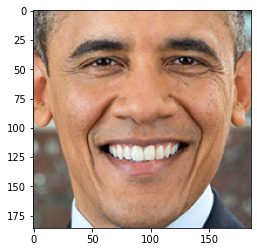

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg' 
# path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/images/' 
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
    %matplotlib inline
    import matplotlib.pyplot as plt
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [ ]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(len(embedding[0]))

In [ ]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_file = os.path.join(dir_path,file)
        face = get_gropped_face(image_file)
        embedding = get_face_embedding(face)
        if len(embedding) != 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [ ]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

In [ ]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [ ]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}),거리({})'.format(i,
                                               sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))